# Day 18
## Puzzle 1

In [1]:
import numpy as np

In [2]:
with open("test_input.txt") as f:
    tmp = [i.replace('\n','') for i in f.readlines()]
    test_input = []
    for line in tmp:
        out = []
        for char in line:
            out.append(char)
        test_input.append(out)
test_input = np.array(test_input)

In [3]:
test_input

array([['.', '#', '.', '#', '.', '.', '.', '|', '#', '.'],
       ['.', '.', '.', '.', '.', '#', '|', '#', '#', '|'],
       ['.', '|', '.', '.', '|', '.', '.', '.', '#', '.'],
       ['.', '.', '|', '#', '.', '.', '.', '.', '.', '#'],
       ['#', '.', '#', '|', '|', '|', '#', '|', '#', '|'],
       ['.', '.', '.', '#', '.', '|', '|', '.', '.', '.'],
       ['.', '|', '.', '.', '.', '.', '|', '.', '.', '.'],
       ['|', '|', '.', '.', '.', '#', '|', '.', '#', '|'],
       ['|', '.', '|', '|', '|', '|', '.', '.', '|', '.'],
       ['.', '.', '.', '#', '.', '|', '.', '.', '|', '.']], dtype='<U1')

In [4]:
class day18(object):
    def __init__(self, lumber_area_arr):
        self.original_lumber_area = lumber_area_arr
        self.lumber_area = lumber_area_arr
    
    def evolve1(self):
        new_lumber_area = np.empty_like(self.lumber_area)
        for idx, val in np.ndenumerate(self.lumber_area):
            adj = self.adjacent_string(idx)
            if val == '.':
                if adj.count('|') >= 3:
                    newval = '|'
                else:
                    newval = '.'
            elif val == '|':
                if adj.count("#") >= 3:
                    newval = '#'
                else:
                    newval = '|'
            elif val == '#':
                if adj.count('#') >= 1 and adj.count('|') >= 1:
                    newval = '#'
                else:
                    newval = '.'
            else:
                raise ValueError
            new_lumber_area[idx] = newval
        self.lumber_area = new_lumber_area
        
    
    def adjacent_string(self, idx):
        min1 = max(0,idx[0]-1)
        max1 = min(self.lumber_area.shape[0], idx[0]+2)
        min2 = max(0,idx[1]-1)
        max2 = min(self.lumber_area.shape[1], idx[1]+2)
        subarr = self.lumber_area[min1:max1, min2:max2]
        s = "".join(str(i) for i in subarr.flatten())
        s = s.replace(self.lumber_area[idx], "", 1)
        return s

In [5]:
test = day18(test_input)
for i in range(10):
    test.evolve1()
outs = "".join(str(i) for i in test.lumber_area.flatten())
assert outs.count('|') == 37
assert outs.count('#') == 31

In [6]:
with open("input.txt") as f:
    tmp = [i.replace('\n','') for i in f.readlines()]
    puzzle1_input = []
    for line in tmp:
        out = []
        for char in line:
            out.append(char)
        puzzle1_input.append(out)
puzzle1_input = np.array(puzzle1_input)

In [7]:
p1 = day18(puzzle1_input)
output = []
for i in range(1000):
    p1.evolve1()
    outs = "".join(str(i) for i in p1.lumber_area.flatten())
    output.append(outs.count('|')*outs.count('#'))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

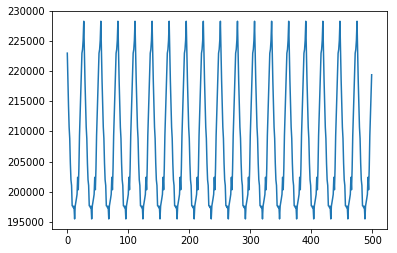

In [10]:
plt.plot(output[500:])

In [27]:
output[520:530]

[209292,
 212872,
 216474,
 219425,
 223014,
 223636,
 225156,
 228324,
 223020,
 218400]

In [25]:
(1000000000)%28

20